In [ ]:
#|default_exp utils
#|hide
import IPython.display as ipd
from tglcourse.utils import load_image_pil # How weird - we're importing code we will define in this notebook!

In [ ]:
#|export
import torch
import torchvision
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Lesson 1: PyTorch Basics

In [ ]:
#|echo: false
ipd.display(ipd.IFrame(src="https://www.youtube.com/embed/QgkFHv3680M", width="560", height="315"))

PyTorch is primarily a deep learning framework. It has been designed to make creating and working with deep neural networks as easy, fast and flexible as possible. Today we'll look at one of the core components that makes this possible: tensors. We'll start by looking at how to contruct and manipulate tensors, and then apply some of these ideas by representing images as tensors and seeing what we can do with that.

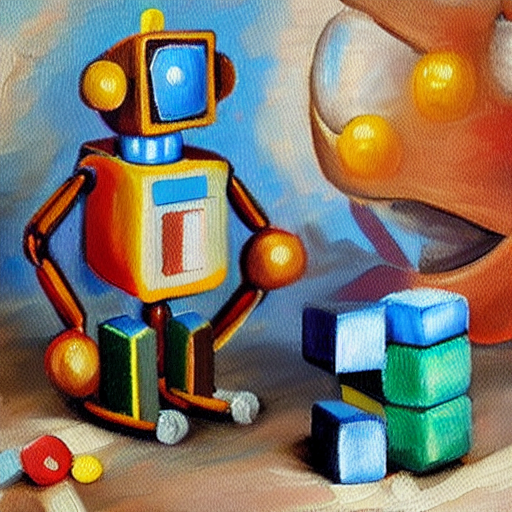

In [ ]:
#| echo: false
load_image_pil('images/An_oil_painting_of_a_cute_baby_robot_playing_with_toy_blocks.png')

Remember: this isn't an exhaustive reference! The goal here is just to begin building a bit of familiarity with some tensor operations - you can always come back later or dig into the excellent [PyTorch Documentation](https://pytorch.org/docs/stable/index.html) for a more complete explanation of what all of these functions can do!

As mentioned in the intro video above, you're welcome to reach out via [Discord](https://discord.gg/vSjhr8xb4g) if you have questions. There is a long-form notebook run-through video [here](https://youtu.be/cwM0KCBXaJ8) where I go through all of the code and explain things in a bit more detail.

## Creating Tensors

We can construct a tensor directly from some common python iterables, such as list and tuple. Nested iterables can also be handled as long as the dimensions make sense.

In [ ]:
# tensor from a list
a = torch.tensor([0, 1, 2])
print(f"Tensor a: {a}")

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)
print(f"Tensor b: {b}")

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


It's easy to get confused as to what 'shape' a tensor has. So debugging tip #1: when in doubt, print out the shape!

In [ ]:
print(b.shape)

torch.Size([2, 2])


There are also various constructor methods you can use. The arguments determine the size - explore changing these are see what happens to the output:

In [ ]:
x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[-1.6948e+14,  4.5755e-41, -6.6485e-26, -1.6412e+22, -1.7098e+14]]])


Notice that `.empty()` does not return zeros, but seemingly random small numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a little bit faster if you are looking to just create a tensor.

There are also constructors for random numbers:

In [ ]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")

Tensor a: tensor([[0.9829, 0.4177, 0.3677]])
Tensor b: tensor([[ 1.0115,  0.2457, -0.6459, -1.9705],
        [-0.1782,  0.4208, -0.1519,  0.2699],
        [-0.2137, -2.2777, -0.5582, -2.0515]])


**THINK**: What's the difference? If you're curious, use `plt.hist(torch.randn(100))` to view the distribution.

There are also constructors that allow us to construct a tensor according to the above constructors, but with dimensions equal to another tensor:

In [ ]:
c = torch.zeros_like(a)
d = torch.rand_like(c)
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.6201, 0.9000, 0.1410]])


Finally,  `.arange()` and `.linspace()` behave how you would expect them to if you are familar with numpy.

In [ ]:
a = torch.arange(0, 10, step=1) # Equivalent to np.arange(0, 10, step=1)
b = torch.linspace(0, 5, steps=11) # np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Tensor b: {b}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor b: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



Again, play with the code above to get familiar with the different arguments and how they affect the output. If you're not sure of what arguments a function takes, you can query it from Jupyter. Remove the `#` then run this cell to see the docstring.

In [ ]:
#?torch.linspace

## Tensor Operations


We can perform operations on tensors using methods under `torch.`. However, in PyTorch most common Python operators are overridden, so we can use those instead. The common standard arithmetic operators (+, -, *, /, and **) have all been lifted to elementwise operations.

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
print('Addition via torch.add:', torch.add(x, y))
print('Addition using "+":', x+y) # The same
print('Some other operations:')
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

Addition via torch.add: tensor([ 2,  4,  7, 12])
Addition using "+": tensor([ 2,  4,  7, 12])
Some other operations:


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

**THINK**: What does 'element-wise' mean? Inspect the outputs above.

Tensors also have many built-in methods such as `.mean()` or `.sum()` (see the full list here: https://pytorch.org/docs/stable/tensors.html). Whenever you're working with a multi-dimensional tensor, pay attention to the dimensions and think about what result you're aiming to achieve.

In [ ]:
x = torch.rand(3, 3)
print('x:\n', x)
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")

x:
 tensor([[0.4153, 0.6779, 0.5828],
        [0.5472, 0.5127, 0.6336],
        [0.3987, 0.8190, 0.7021]])
Sum of every element of x: 5.2892351150512695
Sum of the columns of x: tensor([1.3612, 2.0096, 1.9185])
Sum of the rows of x: tensor([1.6760, 1.6934, 1.9198])


Remember we said most operations default to 'element-wise'? What if we want the matrix operation? Torch has you covered there as well. `torch.matmul()` or the `@` symbol let you do matrix multiplication. For dot multiplication, you can use torch.dot(). 

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.

In [ ]:
a = torch.rand(2, 3)
b = a.T
print('a.shape:', a.shape, 'b.shape:', b.shape)
print(a@b) # Matrix multiplication of a 2x3 with a 3x2 matrix gives a 2x2 result.

a.shape: torch.Size([2, 3]) b.shape: torch.Size([3, 2])
tensor([[0.5995, 0.9596],
        [0.9596, 1.9312]])


## Manipulating Tensors

Beyond mathematical operations, we often want to access specific items or sets if items in a tensor, or perform operations like changing the shape of a tensor. Here are a few examples of some common tasks. These may feel simple if you're used to something like numpy, but it's worth making sure you know how to do these basic operations (or at least, you know where to find these examples again to refer to them!) since we'll use these a lot in the coming lessons. 

In [ ]:
# Indexing tensors
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3]) # From index 1 up to but NOT INCLUDING index 3
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


Reshaping works as long as the shapes make sense. (3, 4) -> (4, 3) is fine, but (3, 4) -> (8, 2) won't work since there aren't enough elements!

In [ ]:
print('Starting tensor:')
z = torch.arange(1, 13)
print('z.shape:', z.shape)
print(f'z: {z}\n')

print('Reshaping to (3, 4):')
z = z.reshape(3, 4)
print('z.shape:', z.shape)
print(f'z:{z}\n')

print('Flattening:')
z = z.flatten()
print('z.shape:', z.shape)
print(f'z: {z}')

Starting tensor:
z.shape: torch.Size([12])
z: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Reshaping to (3, 4):
z.shape: torch.Size([3, 4])
z:tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Flattening:
z.shape: torch.Size([12])
z: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


Concatenating tensors is done with torch.cat - take a look at this examples and take note of how the dimension specified affects the output:

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


#concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


## Squeezing Tensors

When processing batches of data, you will quite often be left with singleton dimensions. e.g. [1,10] or [256, 1, 3]. This dimension can quite easily mess up your matrix operations if you don’t plan on it being there…

In order to compress tensors along their singleton dimensions we can use the .`squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
print(x.shape)
print(f"x[0]: {x[0]}") # printing the zeroth element of the tensor will not give us the first number!

torch.Size([1, 10])
x[0]: tensor([-0.0246, -0.1939, -1.8423, -1.0410, -0.7128,  1.0612,  0.3478,  0.7456,
        -0.7619, -1.0841])


In [ ]:
# lets get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: -0.024552516639232635


In [ ]:
y = torch.randn(5, 5)
print(f"shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1) # Note the argument here is 1 - try 0 and 2 and make sure you get a feel for what unsqueeze does. 
print(f"shape of y: {y.shape}")

shape of y: torch.Size([5, 5])
shape of y: torch.Size([5, 1, 5])


## Images as Tensors

In [ ]:
#|echo: false
ipd.display(ipd.IFrame(src="https://www.youtube.com/embed/MA_2IJYOHLA", width="560", height="315"))

Now that we know how to work with tensors, let's take a look at how we might represent and manipulate images as tensors.

### Images as arrays of numbers

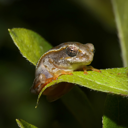

In [ ]:
im = Image.open('images/frog.png').convert('RGB').resize((128, 128))
im

In [ ]:
np.array(im).shape # Remove .convert('RGB') in the cell above and see how this changes

(128, 128, 3)

We'll want to do this a bunch during the course, so let's create a function to load an image using PIL and export it so that we can later access it in other notebooks:

In [ ]:
#|export
def load_image_pil(fn, size=None):
    im = Image.open(fn).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

And to test that it works:

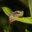

In [ ]:
load_image_pil('images/frog.png', size=(32, 32))

It will probably come in handy to be able to load images from a url, so let's export a function for that too:

In [ ]:
#|export
import requests
from io import BytesIO

def pil_from_url(url, size=None):
    response = requests.get(url)
    im = Image.open(BytesIO(response.content)).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

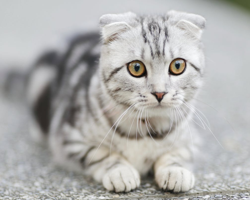

In [ ]:
pil_from_url("https://images.pexels.com/photos/156934/pexels-photo-156934.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1", size=(250, 200))

### Converting to Tensors

We can get a numpy array from a PIL image like so:

In [ ]:
im = load_image_pil('images/frog.png', size=(32, 32))
image_array = np.array(im)

In [ ]:
image_array.shape

(32, 32, 3)

This array has shape (32, 32, 3). The (3) is the channels (Red, Green, Blue). The values are integers between 0 and 255 (8-bit numbers). For compatability with various tools in the PyTorch world, we're going to shuffle things around so that the channels dimension comes first, and we'll represent images as floats between 0 and 1:

In [ ]:
tensor_im = torch.tensor(np.array(im)).permute(2, 0, 1)/255.0
tensor_im.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_im.min(), tensor_im.max()

(tensor(0.), tensor(0.7804))

The torchvision library does this for us too:

In [ ]:
to_tensor_transform = torchvision.transforms.ToTensor()
to_tensor_transform(im).shape

torch.Size([3, 32, 32])

This channels-first representation is popular but not universal - keep an eye out for variants if you're using other people's code :) <br>

The final step here is that pytorch also typically works on **batches** of data, and so for images we usually have a tensor of shape (batch_size, channels, width, height). <br>

Since this back-and-forth translation is going to be something we do continuously during this course, let's write functions to do this for us and export them so that we can use these in all the other notebooks:

In [ ]:
#|export
def pil_to_tensor(im):
    im = np.array(im) # To numpy array
    im = torch.tensor(im) # To tensor
    im = im.permute(2, 0, 1) # Rearrange dimensions
    im = im.unsqueeze(0) # Add batch dimension first
    return im/255.0 # Scale down to (0, 1)

def tensor_to_pil(tensor_im):
    tensor_im = tensor_im.squeeze() # In case there is a batch dimension
    tensor_im = tensor_im.detach().cpu() # Detach from computational graph - explained in next lesson!
    tensor_im = tensor_im.permute(1, 2, 0) # Rearrange the channels
    tensor_im = tensor_im.clip(0, 1)*255 # Note that we clip to (0, 1) before scaling to (0, 255)
    im_array = np.array(tensor_im).astype(np.uint8) # Convert to int as required by PIL
    im = Image.fromarray(im_array) # Convert to PIL image
    return im

Let's see this in action:

torch.Size([1, 3, 128, 128])
<class 'PIL.Image.Image'>


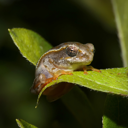

In [ ]:
im = load_image_pil('images/frog.png', size=(128, 128)) # Load an image
tensor_im = pil_to_tensor(im) # To tensor with our function
print(tensor_im.shape)
im_out = tensor_to_pil(tensor_im) # And back to a PIL imge
print(type(im_out))
im_out

Another thing we'll do is visualize images or specific image channels using matplotlib. It is fine with images being floats between 0 and 1, but expects the channels dimension first (for RGB images) or no channel dimension (for single-channel images). To demo this here's how we might plot the three separate color channels in an image:

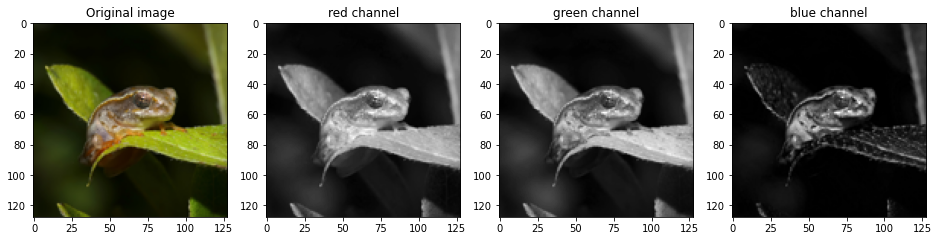

In [ ]:
# Plotting the original image and the three color channels
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
axs[0].imshow(tensor_im[0].permute(1, 2, 0)) # Note: we need to rearrange the color channels
axs[0].set_title('Original image')
colors = ['red', 'green', 'blue']
for i in range(1, 4):
    axs[i].imshow(tensor_im[0][i-1], cmap='gray')
    axs[i].set_title(f'{colors[i-1]} channel')

We can index into the tensor image to access specific slices or parts of the image. For the plotting above, we accessed each channel independantly. We can also select all channels but only a subset of pixels:

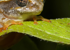

In [ ]:
cropped = tensor_im[0, :, 50:100, 50:120] # First image in batch, all channels, 50px high and 70 wide starting from (50, 50) (top left is 0, 0)
tensor_to_pil(cropped)

In [ ]:
# Exercise: Can you make a greyscale image by taking the mean of the three color channels? 
# You may need to look at the pytorch docs for 'mean', as well as 'expand' or 'repeat' or 'cat' to turn the single-channel 
# result back into a three-channel image. 

### Transforms

We'll often want to perform some kind of image transform, such as zooming, rotating, warping or cropping. You can do this with the Python Imaging Library (PIL) but for performance reasons it is also nice to be able to do these operations on tensors, which is where the torchvision library comes in. Torchvision provides a number fo transforms which we can use on images, including random transforms which are useful for data augmentation. Uncomment the cell below to see a list of some of the available options, and try a few out for yourself:

In [ ]:
# print(dir(torchvision.transforms)[:-16]) # Uncomment to see some of the available options

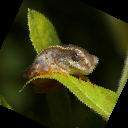

In [ ]:
transform = torchvision.transforms.RandomAffine(30)
tensor_to_pil(transform(tensor_im))

### Exercise: Least Average Image

Let's end this lesson with a bit of an exercise. Given the tensor operations we've looked at, can you find an interesting way to combine a number of images into a single output? For example, given a set of images, for each pixel location find the furthest value from the mean.<br>
Inspiration: https://www.andreweckel.com/LeastAverageImage/ <br>
Experiment with variations on this idea. <br>

An example with stills from a video I made:

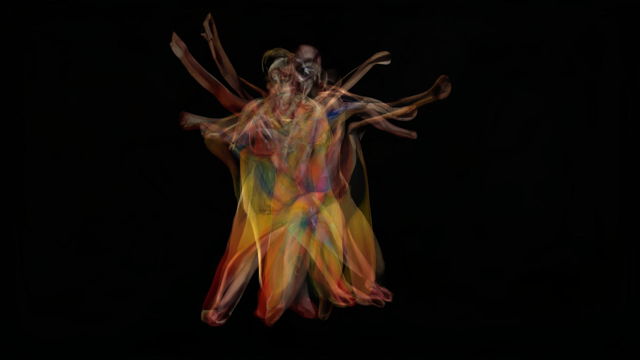

In [ ]:
#|echo:false
load_image_pil('images/lai_video.jpg').resize((1920//3, 1080//3))

And one made in a slightly different way with 5 random images from this course:

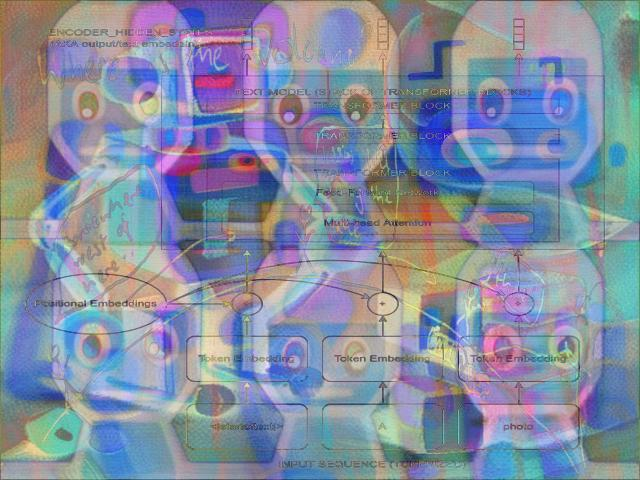

In [ ]:
#|echo:false
load_image_pil('images/lai_eg.jpg')

In [ ]:
# Your code here...

## A Dose of Ethics: Cameras and Race

Cameras often have a limit on their 'dynamic range' - how much difference there can be between the lightest and darkest region of an image. Some sensors can capture more information in the RAW file format, but then processing needs to be done to compress that range down to be represented as the 8-bit jpegs that the rest of us see. A lot of time the camera settings and processing pipeline are automated or use a set of defaults tuned to be convenient for the "average user". 

What does that have to do with race or ethics? Anyone with dark skin will be able to tell you: the defaults often suck for anyone with a different skin tone! Slow progress is being made on adapting photography tools to better handle skin tone variation, but for many years [the defaults have been tied to a specific subset of humanity](https://www.nytimes.com/2019/04/25/lens/sarah-lewis-racial-bias-photography.html), which in turn has had knock-on effects on who gets represented in image data, which in turn means that things like [facial recognition algorithms perform measurably worse on some populations](http://gendershades.org/overview.html).

As you move through this course, keep this in mind: even seeimgly arbitrary technical choices (such as default exposure settings) can have consequences for people down the line. Let's work towards designing inclusive systems that can benefit as many people as possible. 

Page stats: Total Hits: [![HitCount](https://hits.dwyl.com/johnowhitaker/tglcourse.svg?style=flat-square&show=unique)](http://hits.dwyl.com/johnowhitaker/tglcourse)
Page visitors:
![visitor badge](https://page-views.glitch.me/badge?page_id=tglcourse.l01)